In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings

In [2]:
data = pd.read_csv('Global_Education.csv', encoding='latin1')
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [3]:
data

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,...,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,...,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,...,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,...,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,...,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,...,0,40.73,113.5,9.3,6.89
...,...,...,...,...,...,...,...,...,...,...,...
197,Venezuela,6.423750,66.589730,14,14,...,0,17.88,97.2,79.3,8.80
198,Vietnam,14.058324,108.277199,0,0,...,98,16.75,110.6,28.5,2.01
199,Yemen,15.552727,48.516388,96,96,...,0,30.45,93.6,10.2,12.91
200,Zambia,13.133897,27.849332,0,0,...,92,36.19,98.7,4.1,11.43


In [4]:
data.columns

Index(['Countries and areas', 'Latitude ', 'Longitude',
       'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
       'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
       'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
       'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female',
       'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gross_Tertiary_Edu

In [5]:
col_to_exclude = [ 'Latitude ', 'Longitude','Unemployment_Rate','Birth_Rate']
data = data.drop(columns=col_to_exclude)

In [6]:
data

,Countries and areas,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,...,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment
0,Afghanistan,0,0,0,0,...,0,74,56,104.0,9.7
1,Albania,4,2,6,3,...,58,99,100,107.0,55.0
2,Algeria,0,0,0,0,...,19,98,97,109.9,51.4
3,Andorra,0,0,0,0,...,0,0,0,106.4,0.0
4,Angola,31,39,0,0,...,0,0,0,113.5,9.3
...,...,...,...,...,...,...,...,...,...,...,...
197,Venezuela,14,14,10,10,...,0,0,0,97.2,79.3
198,Vietnam,0,0,0,0,...,81,98,98,110.6,28.5
199,Yemen,96,96,10,21,...,0,0,0,93.6,10.2
200,Zambia,0,0,17,13,...,2,93,92,98.7,4.1


In [7]:
main_data = data

In [8]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
pca = PCA()
pca_result = pca.fit_transform(numeric_data)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= 0.8) + 1

print(f'Количество компонент, объясняющих не менее 80% дисперсии: {num_components}')
print(f'Доля объясненной дисперсии с использованием {num_components} компонент: {cumulative_variance_ratio[num_components - 1]:.4f}')

feature_names = numeric_data.columns
components_matrix = pca.components_[:num_components, :]
for i, component in enumerate(components_matrix):
    print(f"Главная компонента {i+1}:")
    for j, feature_weight in enumerate(component):
        print(f"  Исходный признак {feature_names[j]}: {feature_weight:.4f}")

Количество компонент, объясняющих не менее 80% дисперсии: 4
Доля объясненной дисперсии с использованием 4 компонент: 0.8020
Главная компонента 1:
  Исходный признак OOSR_Pre0Primary_Age_Male: 0.0305
  Исходный признак OOSR_Pre0Primary_Age_Female: 0.0323
  Исходный признак OOSR_Primary_Age_Male: 0.0001
  Исходный признак OOSR_Primary_Age_Female: 0.0000
  Исходный признак OOSR_Lower_Secondary_Age_Male: 0.0111
  Исходный признак OOSR_Lower_Secondary_Age_Female: 0.0058
  Исходный признак OOSR_Upper_Secondary_Age_Male: 0.0354
  Исходный признак OOSR_Upper_Secondary_Age_Female: 0.0285
  Исходный признак Completion_Rate_Primary_Male: 0.4471
  Исходный признак Completion_Rate_Primary_Female: 0.4566
  Исходный признак Completion_Rate_Lower_Secondary_Male: 0.3829
  Исходный признак Completion_Rate_Lower_Secondary_Female: 0.3994
  Исходный признак Completion_Rate_Upper_Secondary_Male: 0.2819
  Исходный признак Completion_Rate_Upper_Secondary_Female: 0.2996
  Исходный признак Grade_2_3_Proficiency

# Главная компонента 1
Главная компонента один отвечает за начальное и среднее образование, наибольший вклад в нее вносят такие переменные как % детей не посещающих начальную школу (по обоим полам), а также % людей не посещающих старшие классы средней школы, все эти признаки имеют вклад 0,3-0,4 в первую главную компоненту
# Главная компонента 2
Вторая главная компонента отвечает за приобретаемые детьми знания за начальную и среднюю школу- основной вклад вносят такие переменные, как навыки чтения и математические знания по окончанию среднего этапа образования, а также уровень грамотности молодежи (по обоим полам) в возрасте от 15-24 лет. Также достаточно сильное влияние в данном случае оказывают % детей получающих среднее и высшее образование в стране (0,15).
# Главная компонента 3
Третья главная компонента сильнее второй показывает грамотность молодежи в возрасте 15-24, также в эту компоненту входит дошкольное образование среди девочек и мальчиков.
# Главная компонента 4
Последняя главная компонента отвечает за образование на начальных этапах. Можно увидеть борольшой коэффициент по таким признакам, как процент непосещаемости начальной школы по обоим полам, а также навыки чтения и математики у обоих полов в начальной школе (2-3 класс).

In [9]:
def perform_clustering(data, method,n):
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(data)

    print(f"\nСредние значения для каждого кластера ({method}):")
    for i in range(n):
        cluster_mean = data.loc[labels == i].mean(axis=0)
        print(f"Кластер {i + 1}: {cluster_mean}")


    print(f"\nСостав кластеров ({method}):")
    for i in range(n):
        cluster_countries = main_data.loc[data.index[labels == i], 'Countries and areas'].astype(str)
        print(f"Кластер {i + 1}:\n {', '.join(cluster_countries)}")

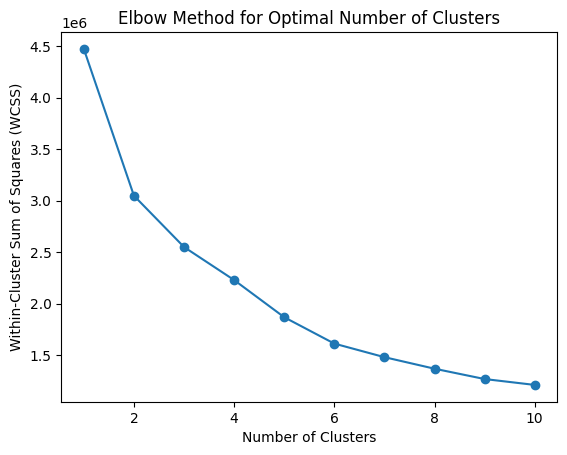

In [10]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [11]:
cluster_data_pca = pca_result[:, :num_components]
perform_clustering(pd.DataFrame(cluster_data_pca, index=main_data.index), "PCA",4)


Средние значения для каждого кластера (PCA):
Кластер 1: 0    105.177434
1     34.961968
2     39.945466
3     -5.613562
dtype: float64
Кластер 2: 0   -95.269449
1    70.277895
2   -36.956201
3     7.025029
dtype: float64
Кластер 3: 0    76.945672
1   -49.884467
2   -60.652433
3     3.036737
dtype: float64
Кластер 4: 0   -62.655800
1   -37.574881
2    33.526307
3    -2.400073
dtype: float64

Состав кластеров (PCA):
Кластер 1:
 Afghanistan, Albania, Algeria, Argentina, Bangladesh, Belarus, Brazil, Cameroon, China, Colombia, Comoros, Republic of the Congo, Costa Rica, El Salvador, Eswatini, Gabon, Ghana, Honduras, India, Indonesia, Jordan, Kazakhstan, Kenya, Kyrgyzstan, Madagascar, Mexico, Mongolia, Montenegro, Namibia, Nepal, Nigeria, Panama, Paraguay, Peru, Rwanda, Sï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿, Sierra Leone, Sri Lanka, Palestinian National Authority, Sudan, Suriname, Thailand, East Timor, Tonga, Uganda, Uruguay, Vietnam, Zambia
Кластер 2:
 Australia, Austria, Belgium, Bulgaria, Canada, Cro

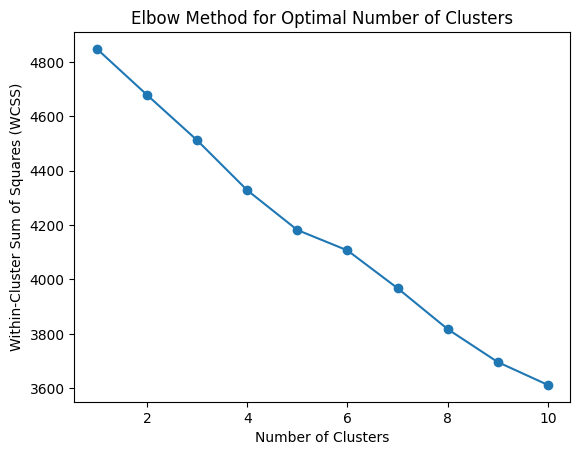

In [12]:
scaler = StandardScaler()
normalized_pca_result = scaler.fit_transform(pca_result)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_pca_result)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [13]:
cluster_data_normalized_pca = normalized_pca_result[:, :num_components]
perform_clustering(pd.DataFrame(cluster_data_normalized_pca, index=main_data.index), "Normalized PCA",5)


Средние значения для каждого кластера (Normalized PCA):
Кластер 1: 0   -1.078359
1    0.955474
2   -0.763950
3    0.309289
dtype: float64
Кластер 2: 0   -0.871087
1   -0.839378
2   -0.021589
3   -0.698637
dtype: float64
Кластер 3: 0    0.682801
1    0.723522
2    0.873204
3   -0.447063
dtype: float64
Кластер 4: 0    1.004923
1   -0.653611
2   -1.234087
3   -0.174972
dtype: float64
Кластер 5: 0    0.151004
1   -0.858748
2    0.687582
3    1.590824
dtype: float64

Состав кластеров (Normalized PCA):
Кластер 1:
 Australia, Austria, Belgium, Bulgaria, Canada, Croatia, Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Germany, Hungary, Iceland, Iran, Republic of Ireland, Israel, Italy, Japan, Lithuania, Netherlands, New Zealand, Nicaragua, Norway, Poland, Portugal, Qatar, South Korea, Saudi Arabia, Singapore, Slovakia, Slovenia, Spain, Sweden, Switzerland, Trinidad and Tobago, United Arab Emirates, United Kingdom, United States
Кластер 2:
 Andorra, Angola, Anguilla, Antigua and Bar

Как видно из первой кластеризации, главные компоненты трудно сравнимы между собой, поэтому было бы логичнее выбрать кластеризацию второго типа с нормализованнымии главными компонентами, дабы привести данные к одному масштабу. 

# Кластер №1
В данный кластер вошли развитые страны и большинство стран среднего уровня развития, у них низкие показатели непосещаемости школьных и дошкольных учереждений, а также высокий уровень грамотности и владения математическими навыками. Это, очевидно, лучший кластер с точки зрения качества образования. 
# Кластер №2
Второй худший кластер с точки зрения образования - большой уровень непосещаемости дошкольных и школьных учереждений, низкий уровень олучения высшего образования, однако там не такой плохой уровень грамотности среди населения как в худшем кластере.
# Кластер №3
Это второй по уровню образования кластер, большинство стран здесь- страны среднего уровня развития, с неплохим образованием, однако отстающие от первого кластера по уровню.
# Кластер №4
Это страны, котовящиеся перейти в третий кластер, образование в этих странах намного ближе к странам среднего уровня развития, чем к развивающимся странам.
# Кластер №5
Худший кластер с точки зрения образования- плохой уровень образованности населения. В этот кластер попало большинство стран Африки, а также несколько стран ближнего востока. Однако стоит заметить, что в странах ближнего востока не у всех женщин есть доступ к получению образования вследствии религии, что определенно может ломать всю картину в данных странах.